In [1]:
# 요구사항
# 4월 23일, 4월 24일 일부 (색칠해진거 1분씩 추가)
# 위를 제외하고 M5107은 3분씩 추가 (서리벌 기준이여서)
# 각 측정시간에서 15~30, 45~60을 벗어나는 버스 시간은 제외

# 요일별로 입력시간에서 2분후 ~ 도착시간에서 7분 전 이내 들어오는 버스의 개수를 측정
# 요일별로 3주간 데이터 3개의 평균값을 사용, 빈 곳은 다른 날짜의 평균
# 이 값이 3분 이상이면 버스를 타도 된다.

# 빵구난 요일은 나머지 2일로 평균..

In [2]:
import csv

In [3]:
# 10:13 -> 10*60 + 13
def parse_time(raw):
    if len(raw) == 4:
        hour = raw[0:2]
        min = raw[2:4]
    elif len(raw) == 5:
        hour = raw[0:2]
        min = raw[3:5]
    hour = int(hour)
    min = int(min)
    min += hour * 60
    return min

# 04월 17일 -> 417
def parse_date(raw):
    #print("INPUT DATE", raw)
    month = raw[0:1]
    month = int(month)

    if len(raw) == 6:
        date = raw[3:5]
    elif len(raw) == 5:
        date = raw[3:4]
    date = int(date)

    return (month, date)

# 곧 12 -> [1, 12]
def parse_bus_info(raw):
    if len(raw) == 0 or raw == "도착예정정보없음" or raw == "x" or raw == "도착정보x" or raw.isspace():
        return []
    
    numbers = []
    raw_numbers = raw.split(' ')
    for raw_number in raw_numbers:
        if raw_number == "곧도착" or raw_number == "곧":
            numbers.append(0)
        elif raw_number.isnumeric():
            numbers.append(int(raw_number))
        else:
            print("unkown string:", raw_number)
    return numbers

In [4]:
# init datas
bus_names = ["1560", "9", "7000", "1112", "5100", "M5107"]
filepath = 'data0503.csv'
dates = [416, 417, 418, 419, 422, 423, 424, 425, 426, 429, 430, 501, 503]
target_row = [4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 75, 82, 96]

bus_arrival_dict = dict()

for name in bus_names:
    bus_arrival_dict[name] = []


In [5]:
# read from csv file

data = []
data.append([])

# 최종적으로 날짜별 버스가 도착한 시간들.
timestamp = dict()

with open(filepath, newline='') as csvfile:
    spamreader = csv.reader(csvfile, quotechar='|')
    row_data = []
    for row in spamreader:
        data.append(row)

In [6]:
# process data
for target in target_row:
    date = parse_date(data[target][0])
    date = date[0] * 100 + date[1]
    timestamp[date] = []
    target = target

    #get bus list
    max_bus_idx = target + 1
    while len(data[max_bus_idx][0]) != 0:
        max_bus_idx += 1 # this is empty row

    for bus_idx in range(target + 1, max_bus_idx):
        bus_name = data[bus_idx][0]
        if bus_name == "5107":
            bus_name = "M5107"
        bus_arrival_list = bus_arrival_dict[bus_name]

        for time_idx in range(1, len(data[target])):
            if len(data[target][time_idx]) == 0:
                continue

            current_time = parse_time(data[target][time_idx]) # 측정 시간
            bus_remain_times = parse_bus_info(data[bus_idx][time_idx])

            for bus_remain_time in bus_remain_times:
                if bus_remain_time >= 30:
                    continue

                actual_bus_time = current_time + bus_remain_time

                # time offset
                if date == 416 or date == 423:
                    actual_bus_time += 3
                elif date == 424 and (current_time == 615
                                      or current_time == 645
                                      or current_time == 675
                                      or current_time == 705
                                      or current_time == 735
                                      or current_time == 765
                                      or current_time == 915
                                      or current_time == 945
                                      or current_time == 975
                                      or current_time == 1005):
                    actual_bus_time += 3
                elif date == 430 and (current_time == 915
                                      or current_time == 945
                                      or current_time == 975
                                      or current_time == 1005):
                    actual_bus_time += 3
                elif bus_name == "M5107":
                    actual_bus_time += 3

                bus_arrival_list.append(actual_bus_time)
                timestamp[date].append(actual_bus_time)


unkown string: 
unkown string: 
unkown string: 


In [7]:
for key in timestamp.keys():
    print("Date", key)
    timestamp[key].sort()
    for t in timestamp[key]:
        print("({}:{})".format(t // 60, t % 60), end=" ")
    print()

Date 416
(10:16) (10:19) (10:21) (10:23) (10:23) (10:29) (10:30) (10:33) (10:53) (10:54) (10:56) (10:57) (10:58) (11:0) (11:3) (11:11) (11:16) (11:18) (11:21) (11:21) (11:24) (11:24) (11:30) (11:38) (11:44) (11:46) (11:51) (11:53) (11:53) (11:54) (11:55) (11:57) (12:8) (12:8) (12:21) (12:22) (12:24) (12:25) (12:31) (12:31) (12:36) (12:41) (12:48) (12:51) (12:52) (12:56) (12:59) (13:5) (13:8) (13:15) (13:54) (13:56) (13:57) (13:58) (14:6) (14:8) (14:13) (14:15) (14:16) (14:19) (14:23) (14:25) (14:26) (14:32) (14:34) (14:58) (15:4) (15:4) (15:6) (15:10) (15:15) (15:15) (15:19) (15:28) (15:28) (15:31) (15:34) (15:38) (15:40) (15:52) (15:55) (16:1) (16:2) (16:3) (16:4) (16:16) (16:20) (16:23) (16:26) (16:29) (16:29) (16:29) (16:34) (16:53) (16:53) (16:54) (16:56) (17:6) (17:13) 
Date 417
(10:17) (10:18) (10:18) (10:22) (10:23) (10:25) (10:36) (10:37) (10:41) (10:49) (10:51) (10:53) (10:53) (10:57) (11:1) (11:5) (11:5) (11:6) (11:16) (11:21) (11:24) (11:24) (11:28) (11:28) (11:28) (11:36) (

In [8]:
import matplotlib.pyplot as plt

def get_available_bus(date: int, time: int) -> int:
    answer = 0
    data = timestamp[date]

    for bus_time in data:
        if time + 2 <= bus_time and bus_time <= time - (time % 15) + 30 - 7:
            print(bus_time, True);
            answer += 1
    return answer

def plot_date(date: int):
    x = range(613, 1030)
    t = [get_available_bus(date, time) for time in x]

    plt.plot(x, t)
    plt.title(str(date))
    plt.show()

def mask_unused_date(date: int, time: int) -> bool:
    mask = [(416, 795),
            (417, 1005),
            (418, 645), (418, 675),
            (422, 795), (422, 825), (422, 855), (422, 885),
            (424, 795), (424, 945),
            (425, 885), (425, 975), (425, 1005),
            (429, 675), (429, 705),
            (501, 1005),
            (503, 1005)]
    if date == 502:
        return True
    else:
        for m in mask:
            if date == m[0] and (m[1] <= time and time <= m[1] + 15):
                return True
    return False

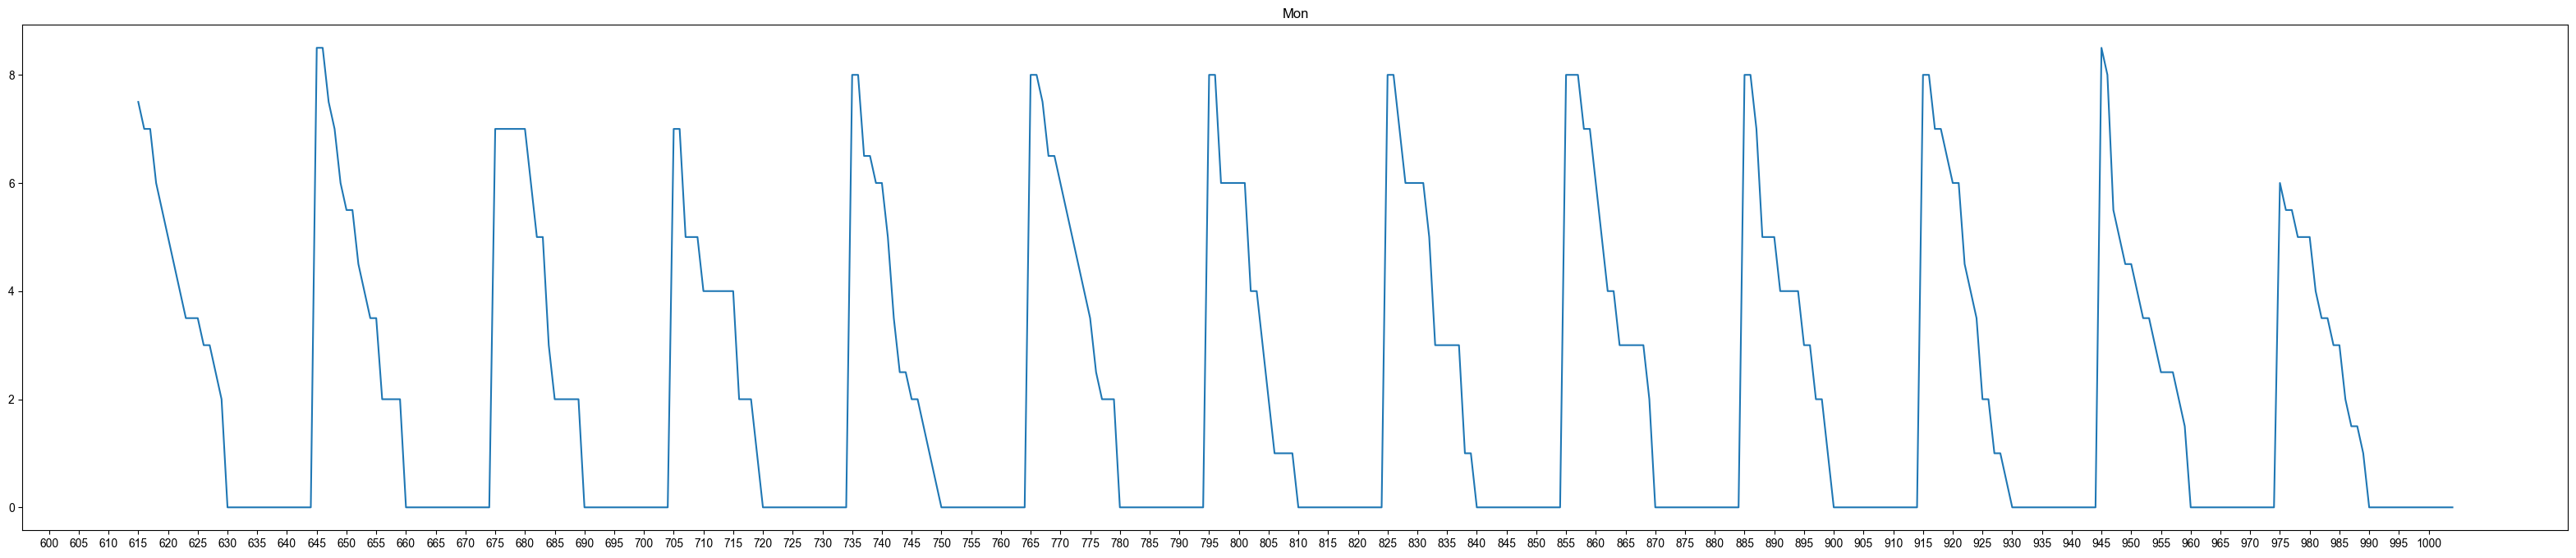

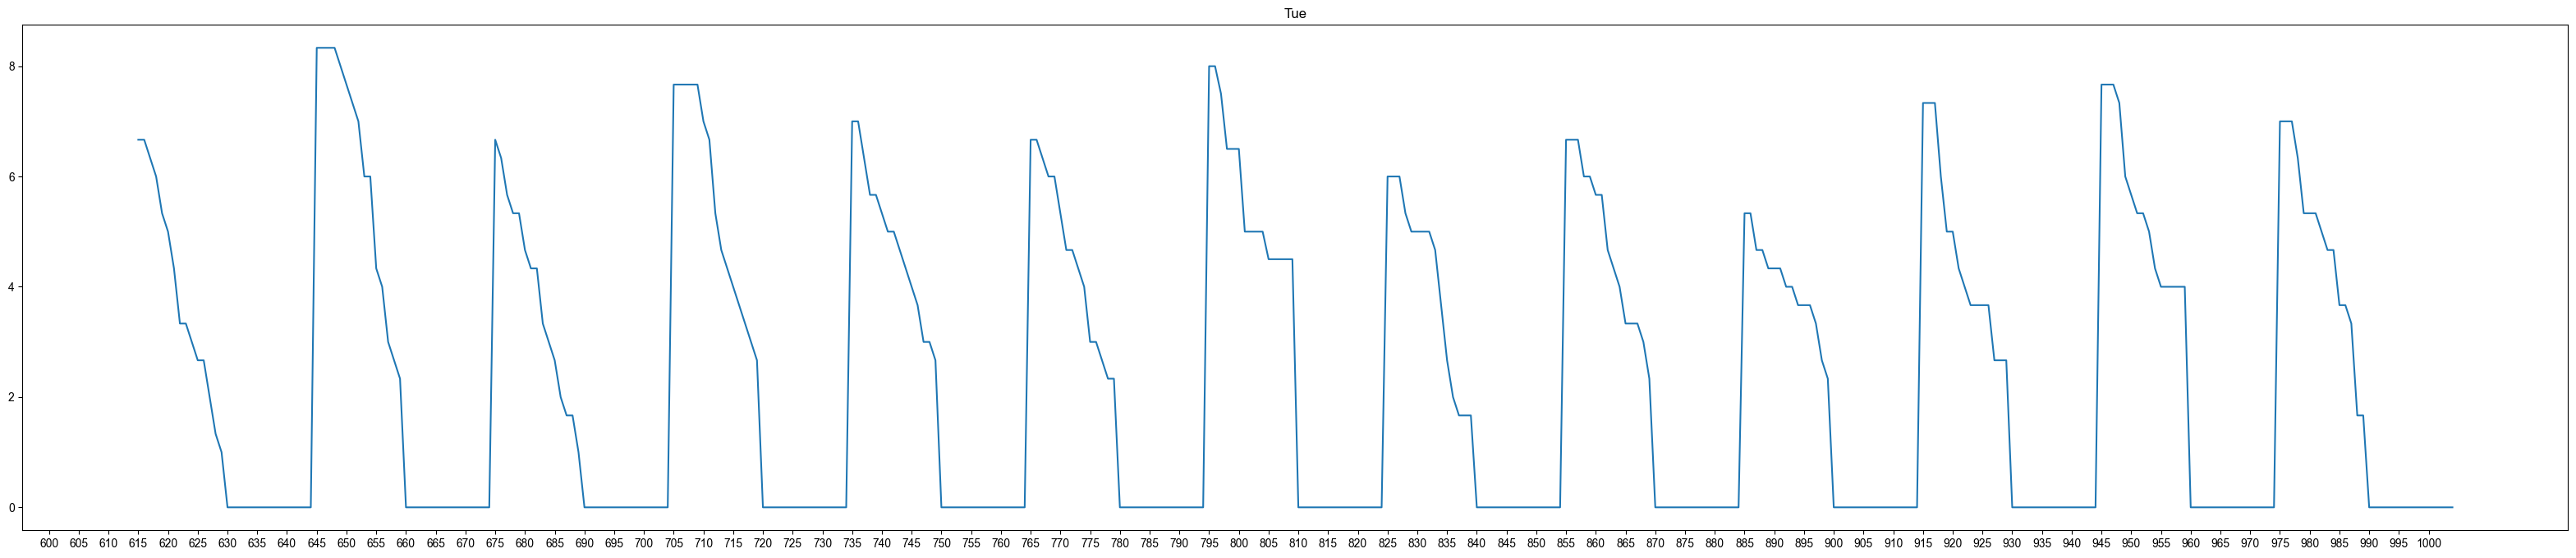

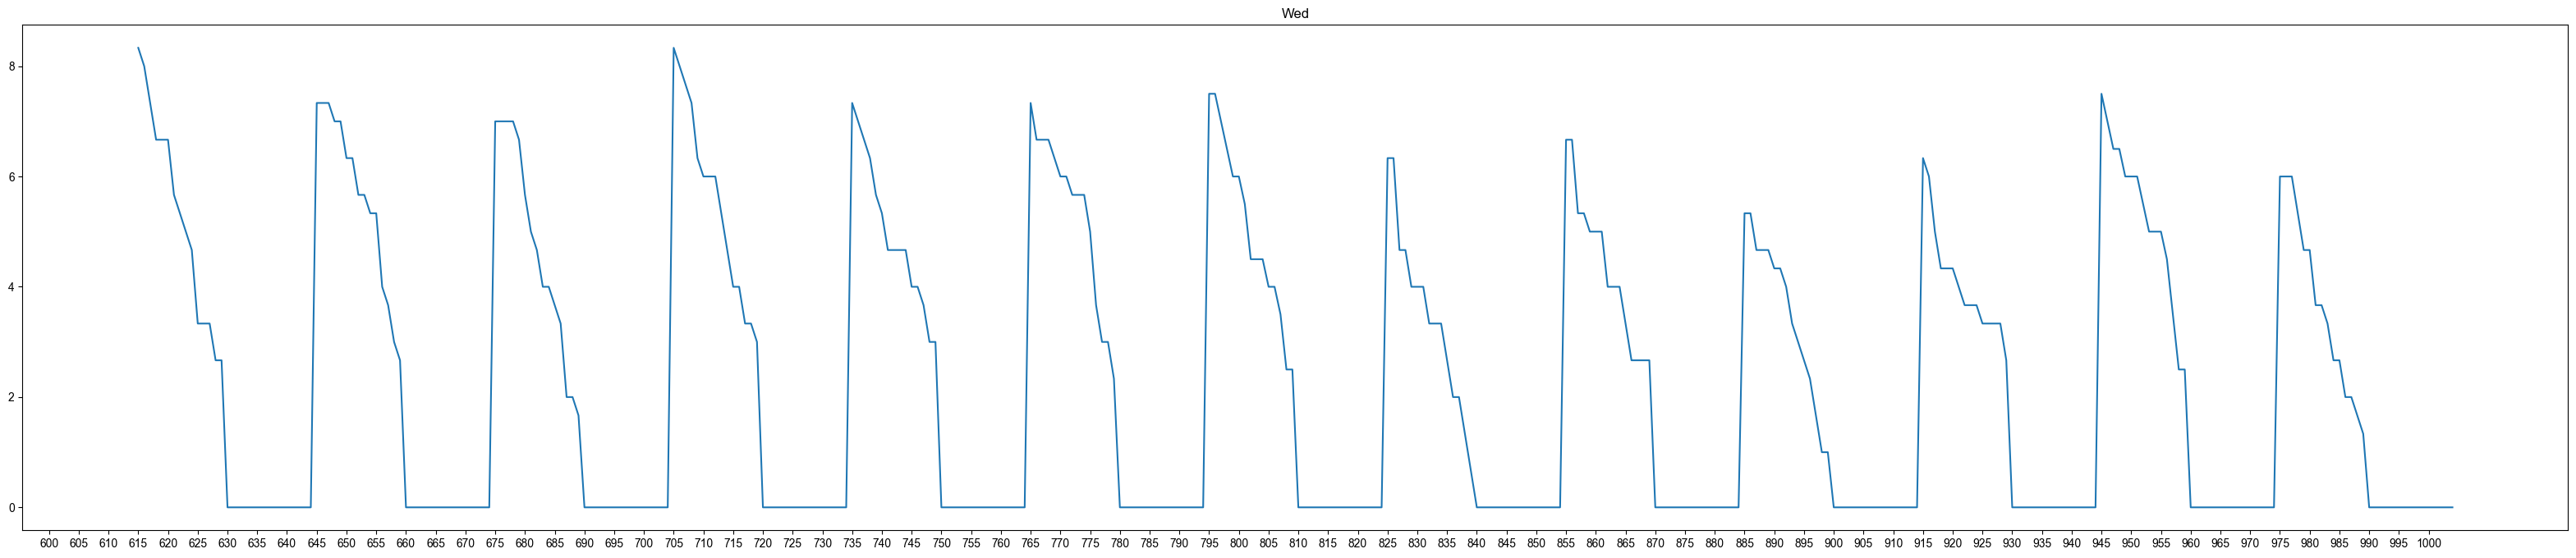

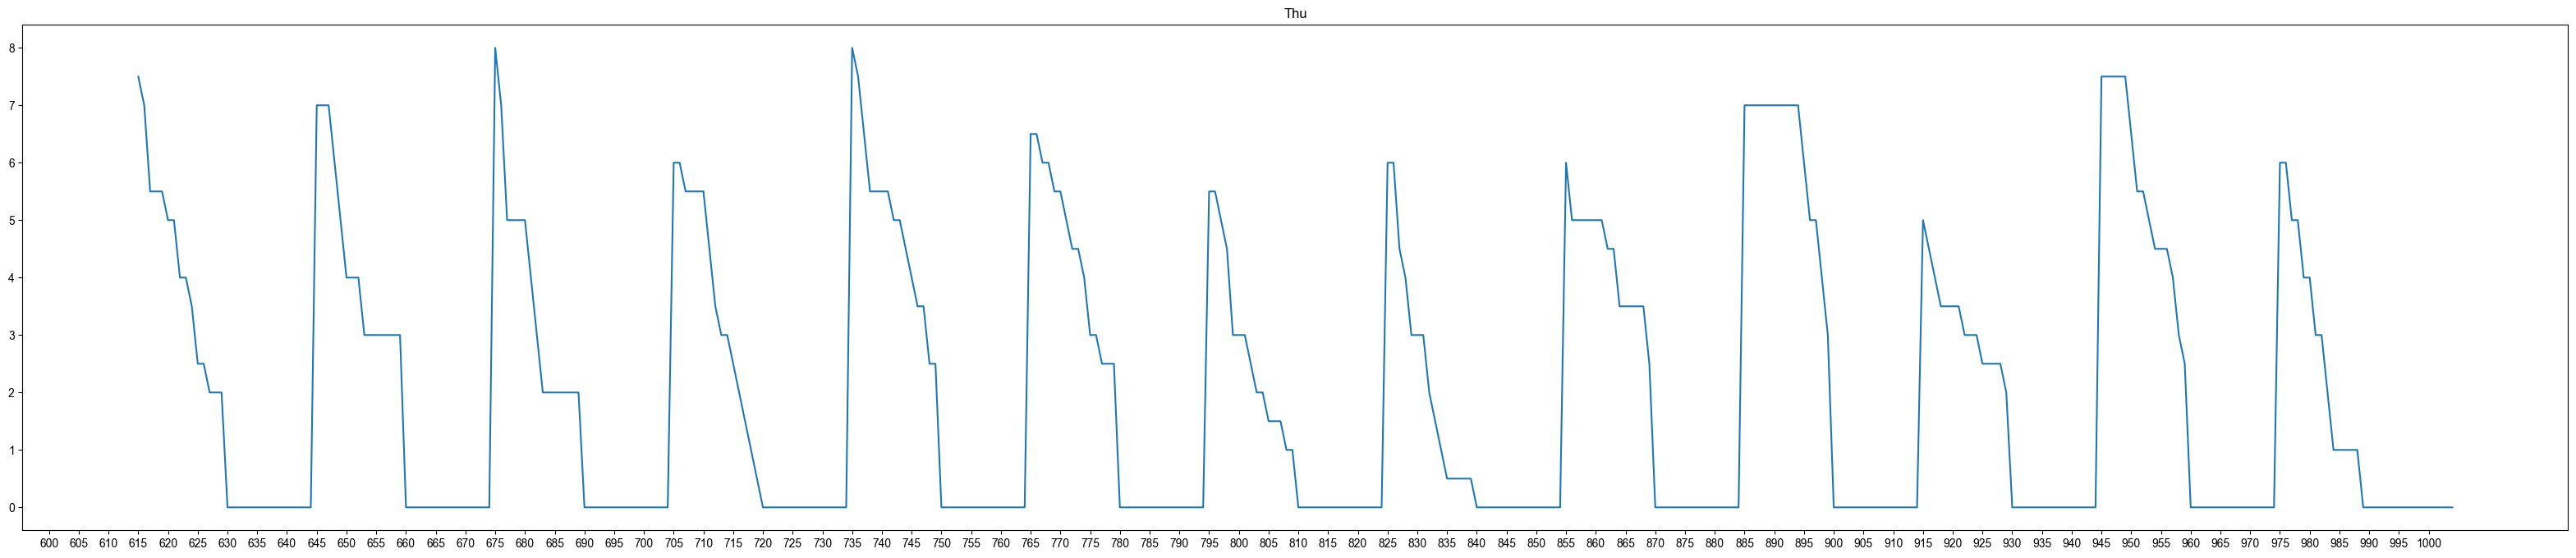

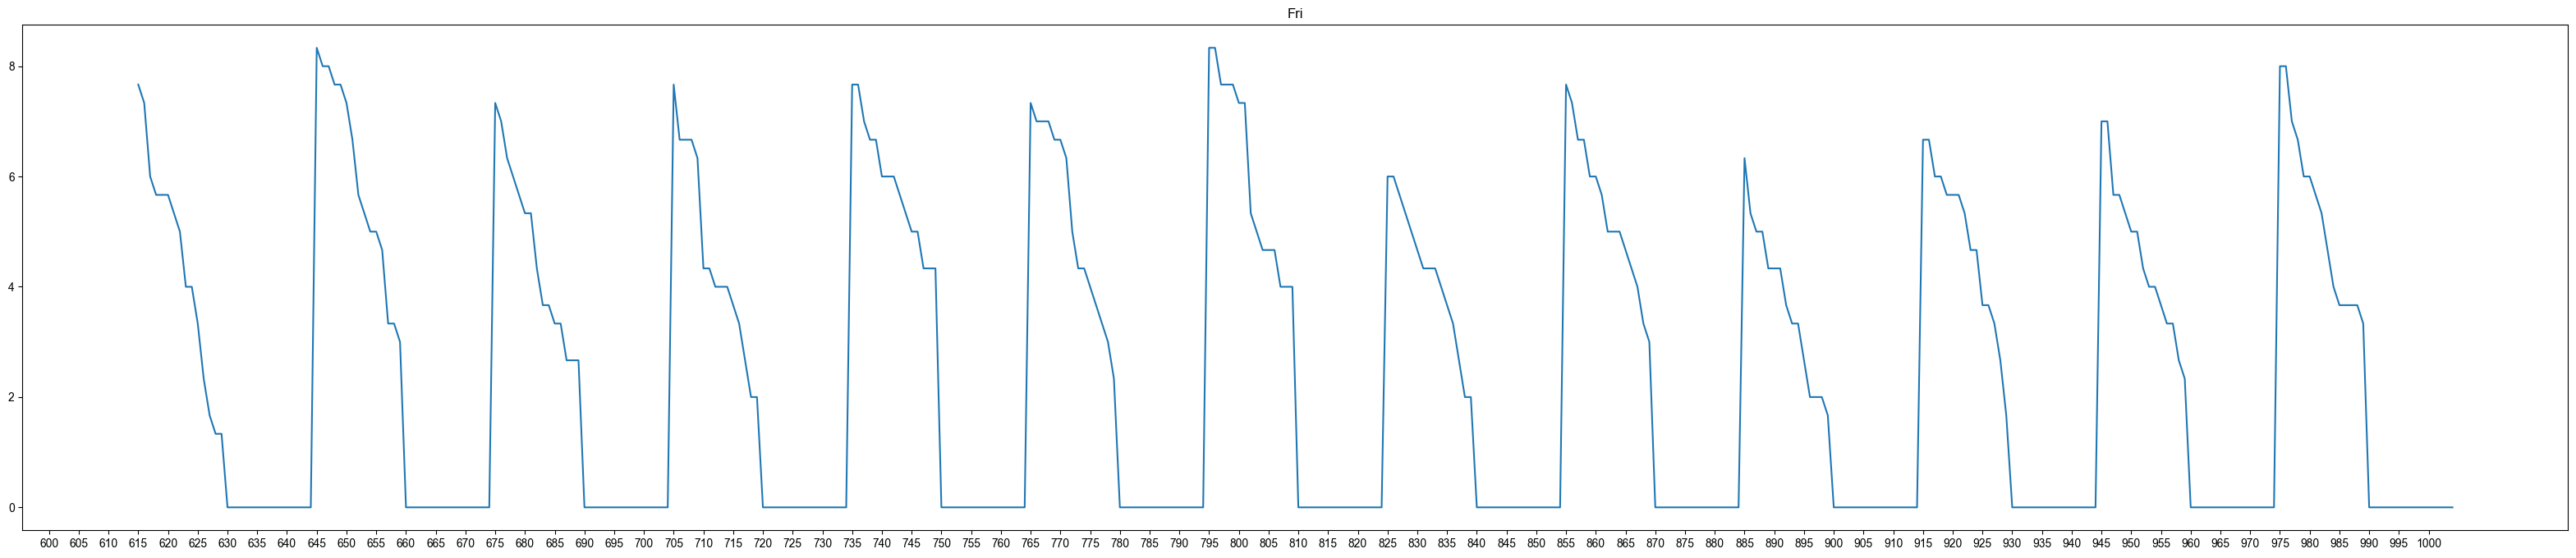

In [9]:
title = ["Mon", "Tue", "Wed", "Thu", "Fri"]
day_of_week = [
        [422, 429],
        [416, 423, 430],
        [417, 424, 501],
        [418, 425],
        [419, 426, 503],
        ]

plt.rc('font', family="Arial")

for idx in range(0, 5):
    days = day_of_week[idx]
    x = [*range(615, 1005)]
    y = 390 * [0]
    for time in range(615, 1005, 30):
        for i in range(0, 15):
            count = 0
            value = 0
            for day in days:
                if not mask_unused_date(day, time + i):
                    value += get_available_bus(day, time + i)
                    count += 1
            y[time + i - 615] = value / count

    plt.figure(figsize=(40, 8))
    plt.plot(x, y)
    plt.xticks(range(600, 1005, 5))
    #plt.ylim((0, 7))
    plt.title(title[idx])
    plt.show()



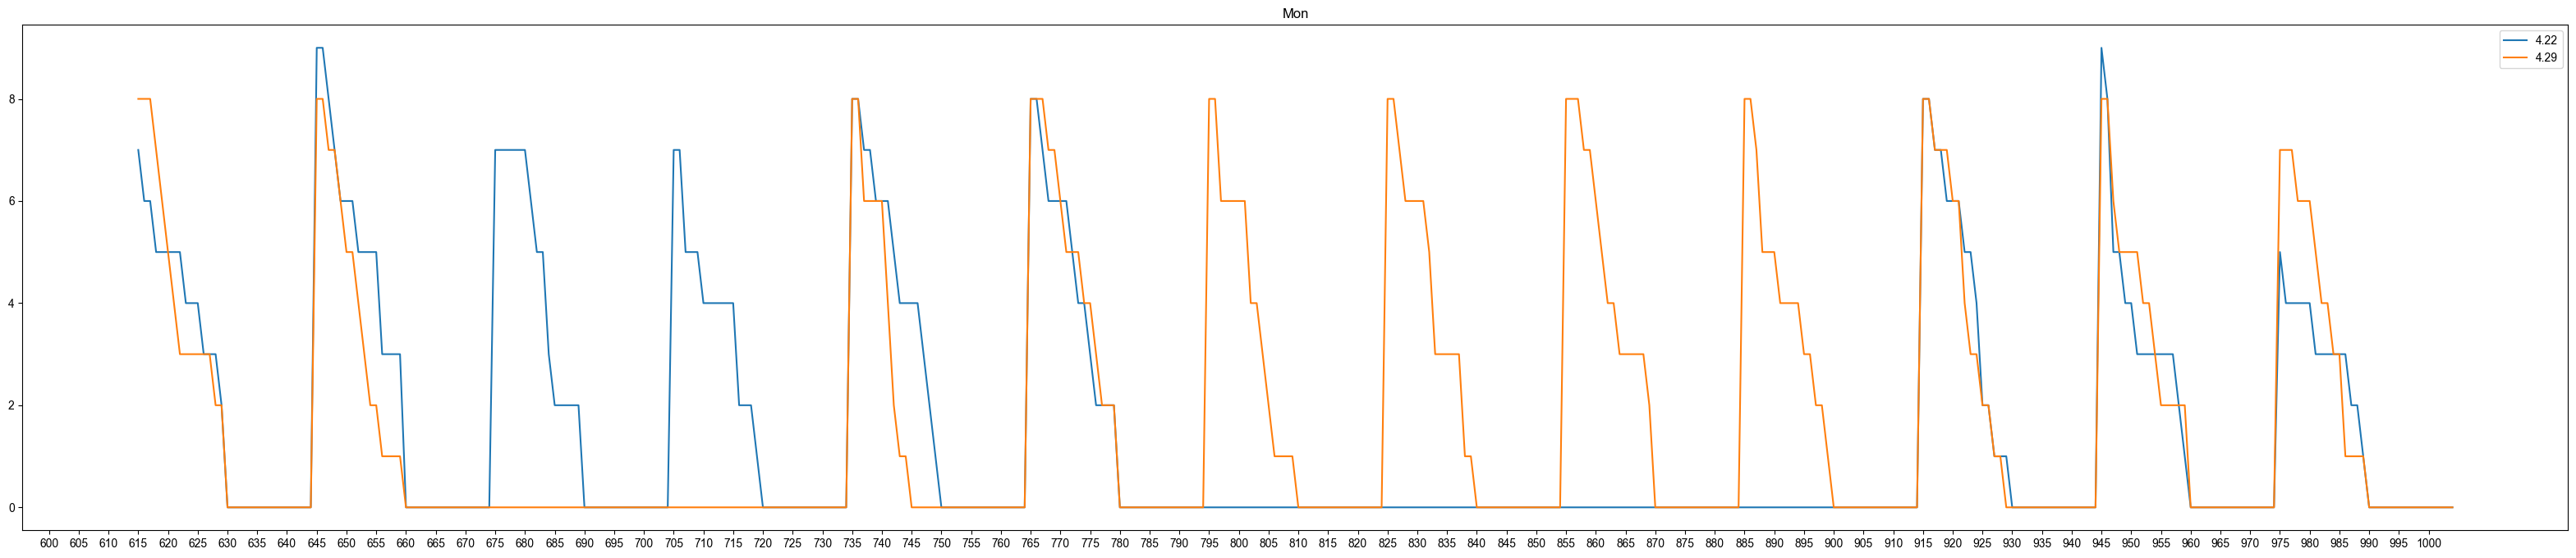

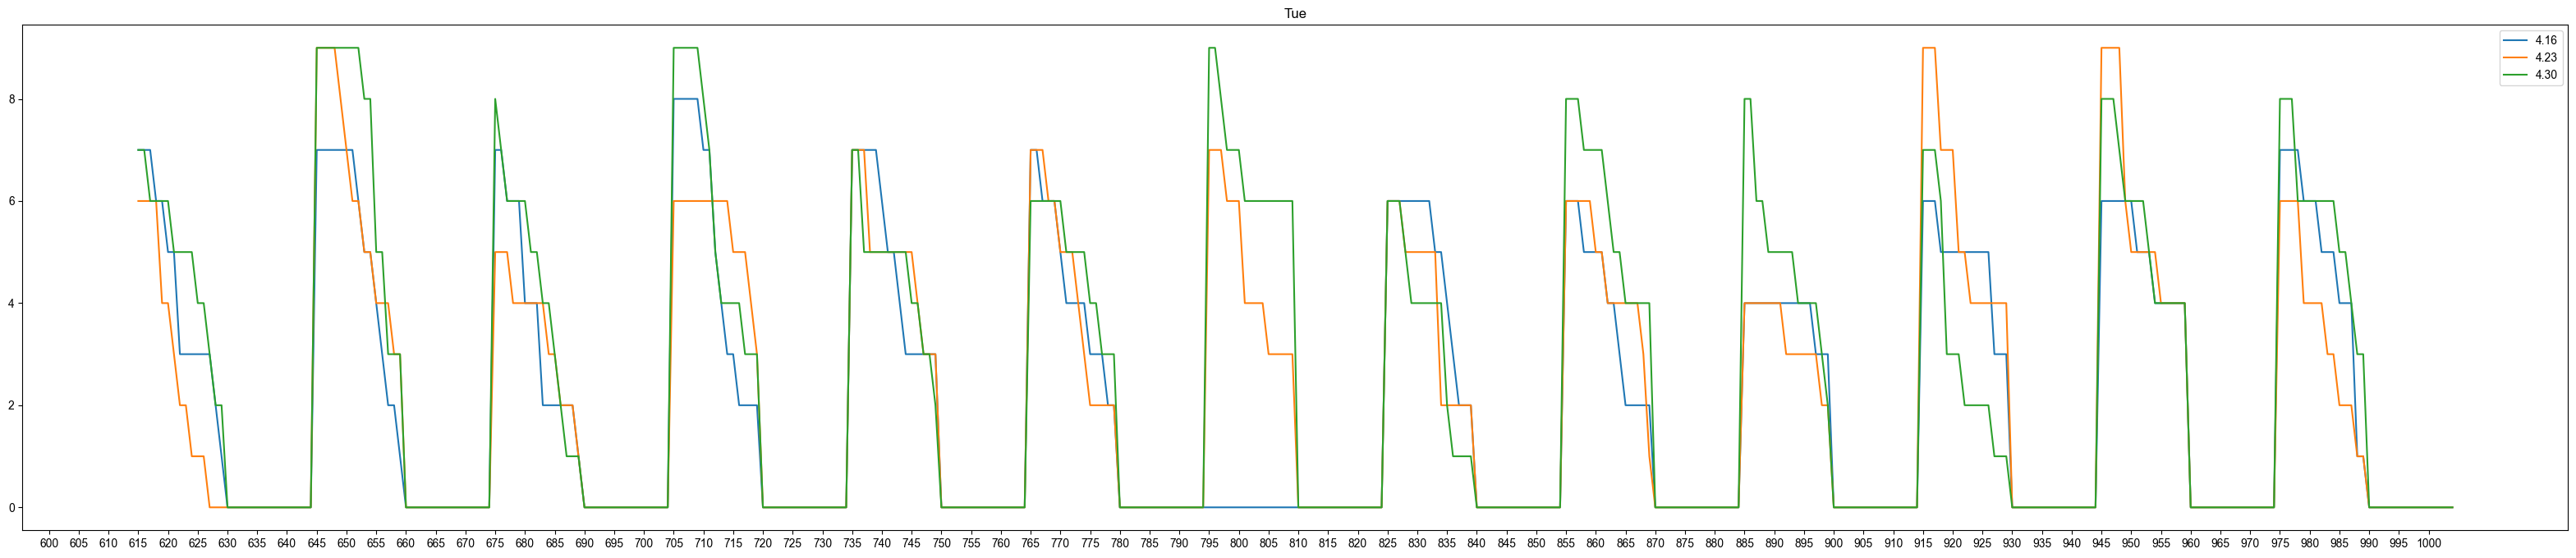

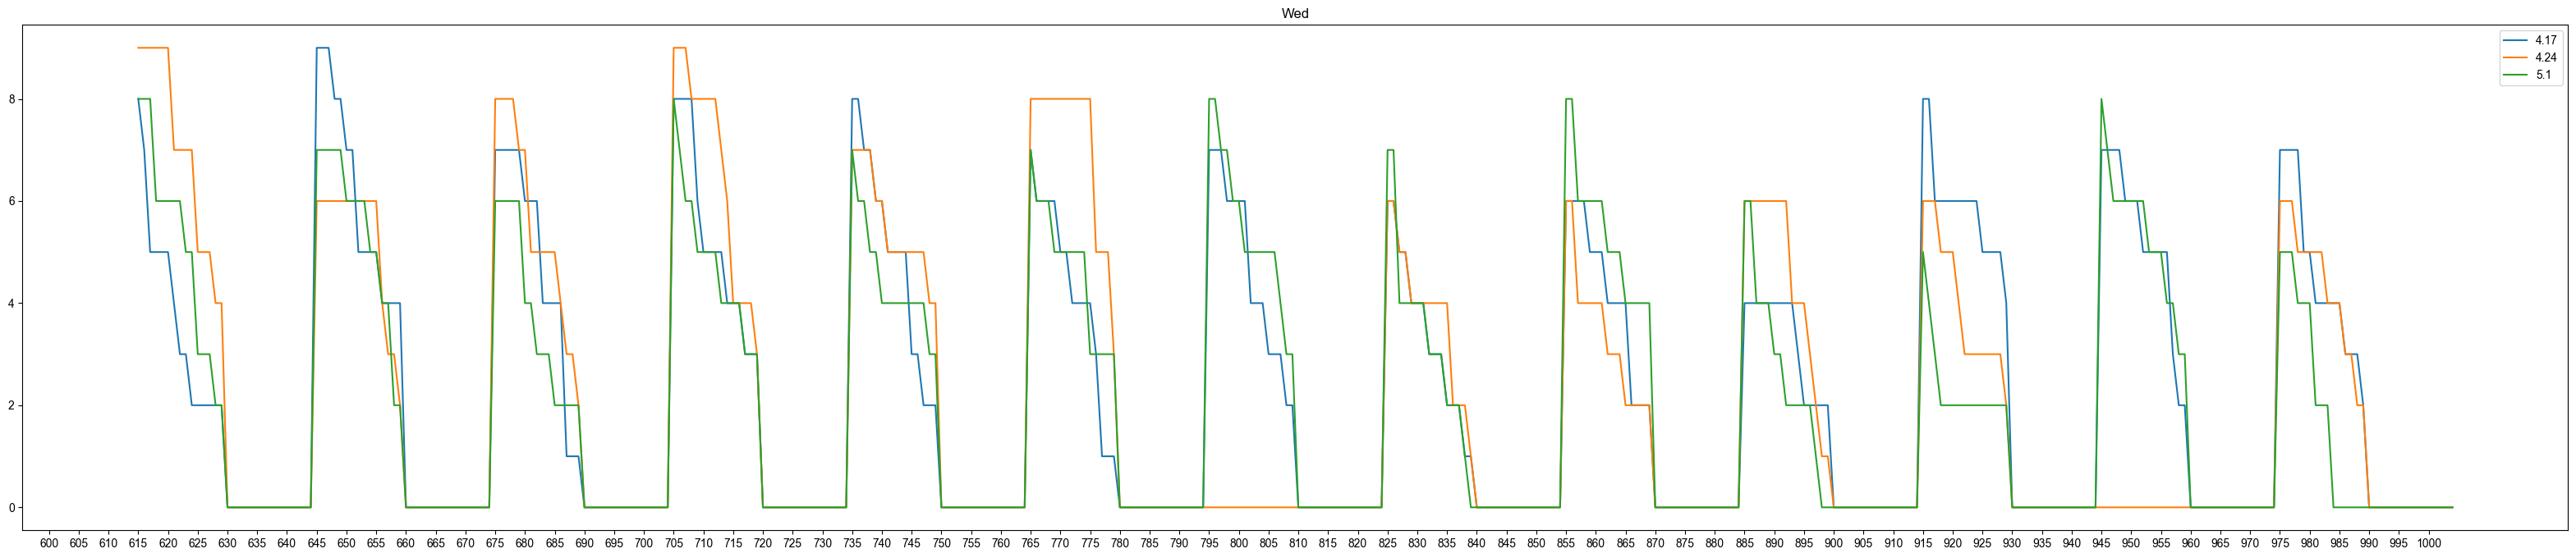

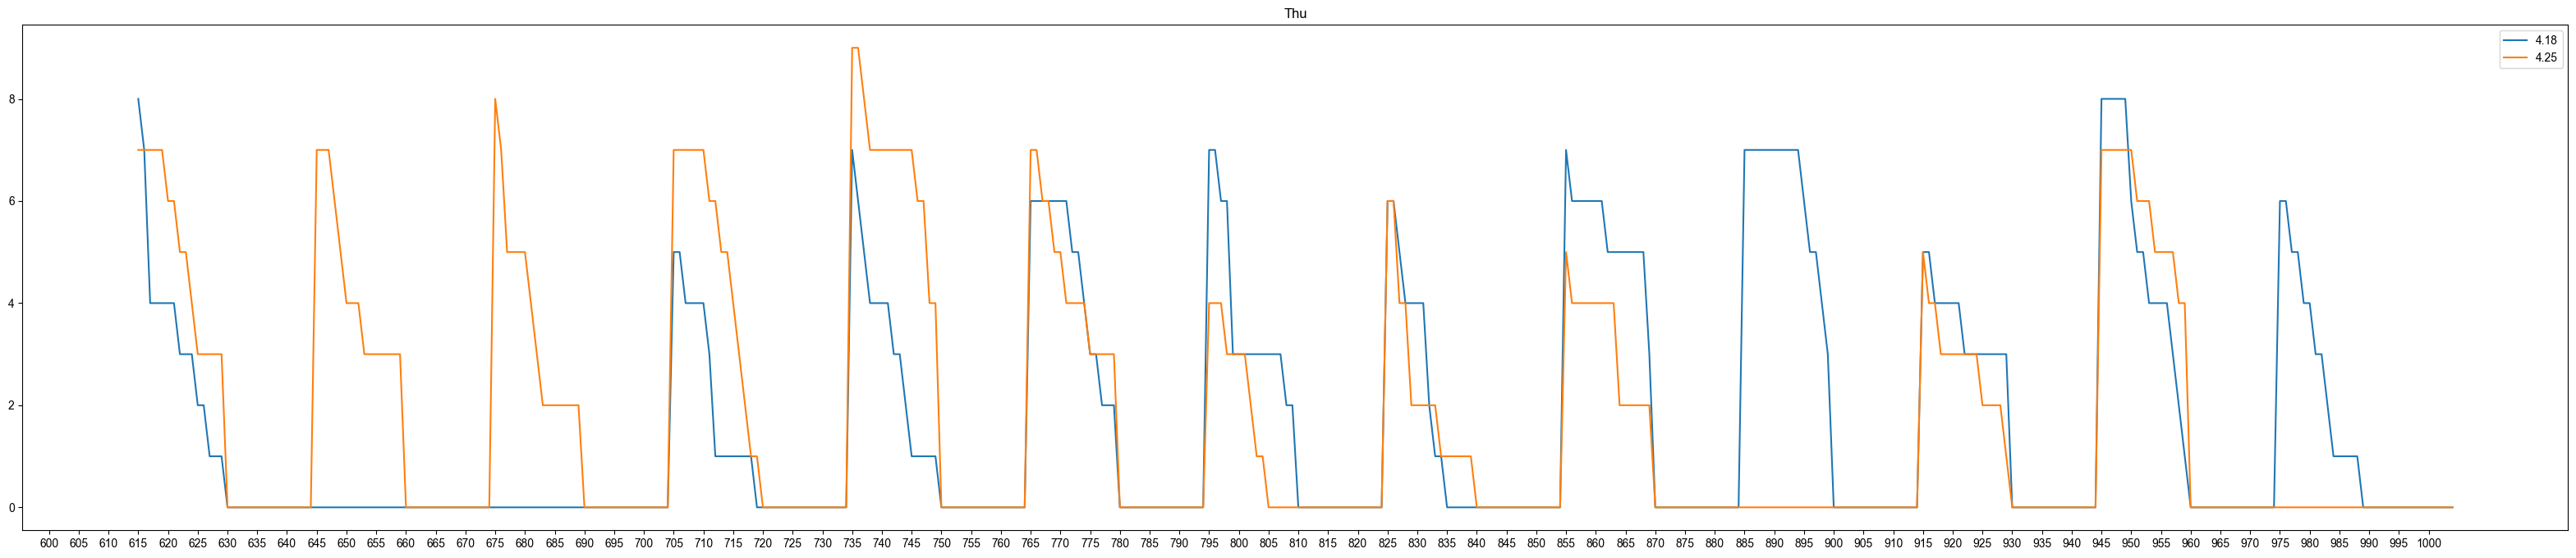

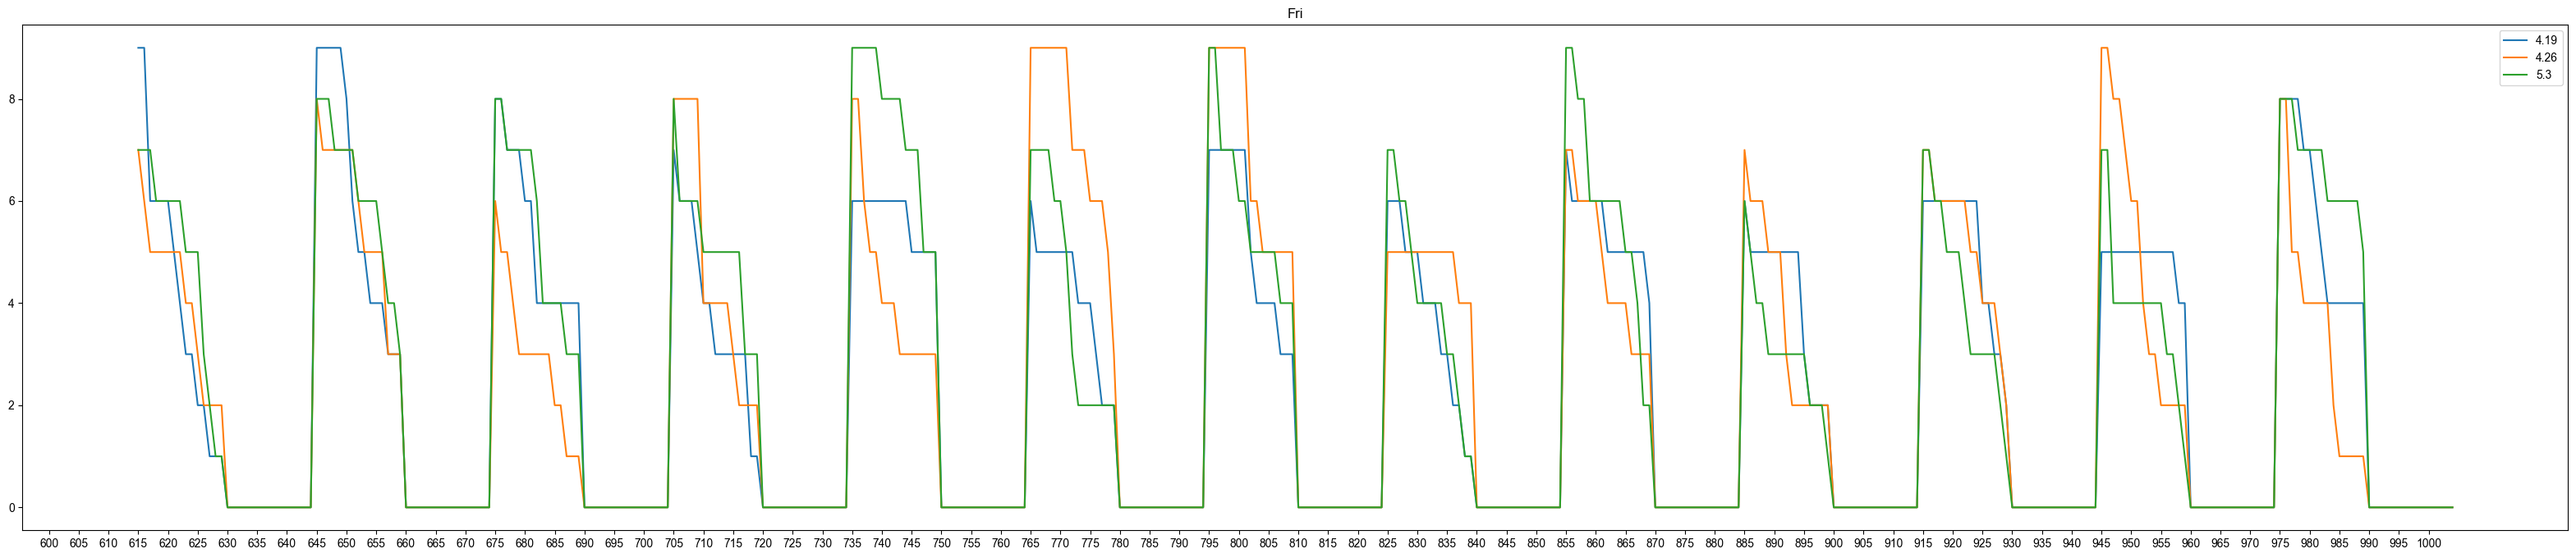

In [10]:
title = ["Mon", "Tue", "Wed", "Thu", "Fri"]
day_of_week = [[422, 429],
        [416, 423, 430],
        [417, 424, 501],
        [418, 425],
        [419, 426, 503]
        ]

plt.rc('font', family="Arial")

for idx in range(0, 5):
    days = day_of_week[idx]
    x = [*range(615, 1005)]
    y = 390 * [0]
    plt.figure(figsize=(40, 8))
    for day in days:
        dayx = [*range(615, 1005)]
        dayy = 390 * [0]
        for time in range(615, 1005, 30):
            for i in range(0, 15):
                count = 0
                value = 0
                if not mask_unused_date(day, time + i):
                    value += get_available_bus(day, time + i)
                    count += 1
                dayy[time + i - 615] = value
        
        plt.plot(dayx, dayy, label="{}.{}".format(day // 100, day % 100))
    plt.legend()
    plt.title(title[idx])
    plt.xticks(range(600, 1005, 5))
    plt.show()


In [11]:
title = ["Mon", "Tue", "Wed", "Thu", "Fri"]
day_of_week = [[422, 429],
    [416, 423, 430],
        [417, 424, 501],
        [418, 425],
        [419, 426, 503],
        ]

output_data = []
output_data.append([*range(600, 1005)])

for idx in range(0, 5):
    days = day_of_week[idx]
    x = [*range(615, 1005)]
    y = 405 * [0]
    for time in range(615, 1005, 30):
        for i in range(0, 15):
            count = 0
            value = 0
            for day in days:
                if not mask_unused_date(day, time + i):
                    value += get_available_bus(day, time + i)
                    count += 1
            y[time + i - 600] = value / count
    output_data.append(y)

for oo in output_data:
    print(oo)

[600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799,

In [12]:
output_data

with open('pdata.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)

    writer.writerows(output_data)
    f.close()

In [13]:
import datetime

def judge(month, day, time) -> bool:
    day = datetime.date(2024, month, day)
    weekday = day.isoweekday()

    if output_data[weekday][time - 600] >= 5.0:
        return True
    else:
        return False

judge(5, 9, 948)

True

In [17]:
timemm = 624

output_data[1][timemm - 600]

get_available_bus(422, 624)

4